# INF8460: Traitement automatique de la langue naturelle

# TP1: Comparaison d'algorithmes pour classification de texte


## Description:

Dans ce premier TP, vous explorerez les bases du traitement automatique du langage naturel. Au cours de ce travail, vous appliquerez concrètement les concepts enseignés en classe pour résoudre une tâche de classification simple. De plus, le processus ressemblera à la manière dont vous aborderiez ce type de problème dans le monde réel. Tout au long de ce laboratoire, vous vous familiariserez avec des bibliothèques couramment utilisées en NLP ainsi qu'en science des données.

Dans ce laboratoire, vous travaillerez avec un jeu de données comprenant des évaluations de produits provenant d'Amazon. Pour chaque évaluation, le jeu de données contient trois informations : le titre fourni par l'utilisateur, le commentaire détaillé et le nombre d'étoiles attribué par l'utilisateur au produit.

L'objectif de cette tâche consistera à prédire le nombre d'étoiles attribué à une évaluation à partir du commentaire et du titre qui lui sont associés.

Le travail sera divisé en 3 parties:

 - Chargement, prétraitement et visualisation des données: Dans cette première partie, vous allez charger et prétraiter les données afin qu'elles soient prêtes à être utilisées par les algorithmes lors de la deuxième partie.
 - Classification: Cette partie consistera à explorer les différents algorithmes pouvant être appliqués à cette tâche. Vous ferez aussi une analyse des sorties du classificateur bayésien naïf.
 - Amélioration de modèle: Cette dernière partie consistera à améliorer votre modèle de 2 façons différentes. D'abord, vous ferez une recherche d'hyper-paramètres avec de la validation croisée en utilisant un GridSearch. Ensuite, vous ferez de l'extraction d'attributs avec l'aide de ChatGPT afin de d'entrainer un nouveau modèle et de comparer ainsi une représentation de type "Bag of words" et une représentation avec attributs spécifiques. 


## Plan du TP

1.    [Chargement, prétraitement et visualisation des données](#1)
- 1.1   [Charger les données](#1.1)
 - 1.1.1 [Charger le jeu de données](#1.1.1)
 - 1.1.2 [Fusionner les colonnes title et text en une seule colonne](#1.1.2)
- 1.2   [Prétraitement des données](#1.2)
- 1.3   [Visualisation des données](#1.3)
 - 1.3.1 [Afficher dans un graphique le nombre d'exemples présents dans le jeu de données pour chaque catégorie](#1.3.1)
 - 1.3.2 [Afficher dans un graphique la quantité moyenne de jetons par exemple selon la catégorie](#1.3.2)
 - 1.3.3 [Afficher en texte les top 10 jetons les plus fréquents par catégorie](#1.3.3)
 - 1.3.4 [Afficher en texte les top 10 adjectifs les plus fréquents selon la catégorie](#1.3.4)
- 1.4   [Diviser les données en ensembles d'entraînement et de test](#1.4)
- 1.5   [Construction du vocabulaire](#1.5)
- 1.6   [Vectorisation des données](#1.6)
2.    [Classification](#2)
- 2.1   [Modèle aléatoire (Random baseline)](#2.1)
- 2.2   [Analyse et compréhension d'un classificateur bayésien naïf (NB)](#2.2)
 - 2.2.1 [Construction du modèle](#2.2.1)
 - 2.2.2 [Matrice de confusion](#2.2.2)
 - 2.2.3 [Visualisation des probabilités de NB](#2.2.3)
 - 2.2.4 [Visualisation des erreurs commises](#2.2.4)
 - 2.2.5 [Analyse d'erreurs commises](#2.2.5)
- 2.3   [Régression logistique](#2.3)
- 2.4   [MLP](#2.4)
3.    [Amélioration de modèle](#3)
- 3.1   [Recherche d'hyper-paramètres et validation croisée](#3.1)
- 3.2   [Extraction d'attributs (Feature extraction) avec ChatGPT](#3.2)
- 3.3   [Amélioration du modèle en 3.2](#3.3)





<a name='1'></a>
## 1. Chargement, prétraitement et visualisation des données (30 points)

Dans cette première partie, vous allez charger et prétraiter les données afin qu'elles soient prêtes à être utilisées par les algorithmes lors de la deuxième partie.

<a name='1.1'></a>
### 1.1 Charger les données  (2 points)

Ce numéro doit être résolu en utilisant la bibliothèque **pandas**.

<a name='1.1.1'></a>
#### 1.1.1 Charger le jeu de données (1 point)

Chargez le jeu de données amazon_rating.csv. Affichez ensuite son contenu.


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('amazon_rating.csv')
print(data)

                           title  \
0                     Five Stars   
1                    Did The Job   
2                  Great product   
3     Leaking Acid EVERYEWHERE!!   
4                       One Star   
...                          ...   
2788                 Three Stars   
2789      Good for kids but SLOW   
2790         good tablet to star   
2791          Just decent tablet   
2792                    One Star   

                                                   text  rating  
0                                good as any name brand       5  
1     Ordered on accident when I had searched for RE...       3  
2     I was looking for something to read on and thi...       5  
3     After 2nd recharge and use all but 3 are leaki...       1  
4     They fail earlier than brand names. I assumed ...       1  
...                                                 ...     ...  
2788     Weird but some didn't last long as they should       3  
2789  A good starter tablet, but very v

<a name='1.1.2'></a>
#### 1.1.2 Fusionner les colonnes title et text en une seule colonne (1 point)

Afin de faciliter la tâche pour le reste du TP, nous allons fusionner ces deux colonnes afin que nous n'ayons qu'un seul texte à considérer lors de la vectorisation.

Afin de s'assurer de l'intégrité des textes, fusionnez-les à l'aide d'un espace. Par exemple, une évaluation ayant le titre "Five Stars" et le commentaire "good as any name brand" aura comme texte final "Five Stars good as any name brand".

Stockez le résultat dans la colonne "text" et supprimez la colonne "title".

In [3]:
data["text"] = [title + " " + text for (title, text) in zip(data["title"], data["text"])]
data.drop(["title"], axis=1, inplace=True)

<a name='1.2'></a>
### 1.2 Prétraitement des données (4 points)

En utilisant la librairie nltk, implémentez la fonction suivante qui :

- Enlève les majuscules.
- Enlève les caractères de ponctuation.
- Segmente la séquence en entrée en une liste de jetons (tokenization).
- Enlève les "stopwords"
- Effectue la racinisation.
- Retourne l'ensemble des jetons de la séquence
    

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

stopwords = stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()
#lemmer = nltk.stem.wordnet.WordNetLemmatizer()


def preprocess(sentence):
    """
    Fonction qui transforme une chaine de caractère en liste de jetons.
    Les pre-traitements à implémenter sont: 
    1. Enlever les majuscules
    2. Enlever les caractères de ponctuations
    3. Séparer la chaine de caractères en une liste de jetons (tokenization) 
    4. Enlever les stopwords
    5. Stemming (racinisation)
    
    :param sentence: une chaine de caractère
    :return: la liste de jetons
    """ 

    sentence = sentence.lower()
    sentence = re.sub(r'[^\w\s]', '', sentence)
    tokens = word_tokenize(sentence)
    tokens = [token for token in tokens if token not in stopwords]
    tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
"""
NE PAS MODIFIER

Le code suivant appliquera votre fonction sur tous les exemples. Il gardera aussi une version originale pour une analyse future.
"""
data["text_original"] = data["text"]
data["text"] = data["text"].apply(preprocess)

<a name='1.3'></a>
### 1.3 Visualisation des données (15 points)

**Utilisez la bibliothèque matplotlib pour les graphiques.** Vous pouvez utiliser n'importe quelle classe de base de Python, par exemple collections.Counter, qui sera utile pour l'affichage des jetons.

La colonne "rating" contient le nombre d'étoiles associé à l'évaluation d'un utilisateur. Le nombre d'étoiles varie entre 1 et 5.

Afin de simplifier la tâche de classification, nous avons enlevé les commentaires ayant 2 et 4 étoiles du jeu de données. Cela signifie qu'il y a trois catégories de commentaires, c'est-à-dire ceux ayant 1, 3 ou 5 étoiles.

Affichez dans un graphique :

- Le nombre d'exemples présents dans le jeu de données par catégorie.
- La quantité moyenne de jetons par exemple selon la catégorie.


<a name='1.3.1'></a>
#### 1.3.1  Afficher dans un graphique le nombre d'exemples présents dans le jeu de données pour chaque catégorie  (3 points)

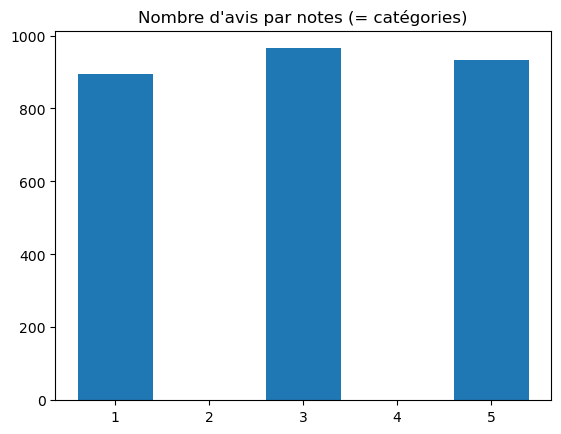

In [6]:
import matplotlib.pyplot as plt

ratings_counts = {}

for rating in data['rating']:
  if rating in ratings_counts:
    ratings_counts[rating] += 1
  else:
    ratings_counts[rating] = 1

xs,ys = list(zip(*(ratings_counts.items())))

plt.bar(xs, ys)
plt.title('Nombre d\'avis par notes (= catégories)')
plt.show()

<a name='1.3.2'></a>
#### 1.3.2 Afficher dans un graphique le nombre moyen de jetons dans les exemples de chaque catégorie (4 points)

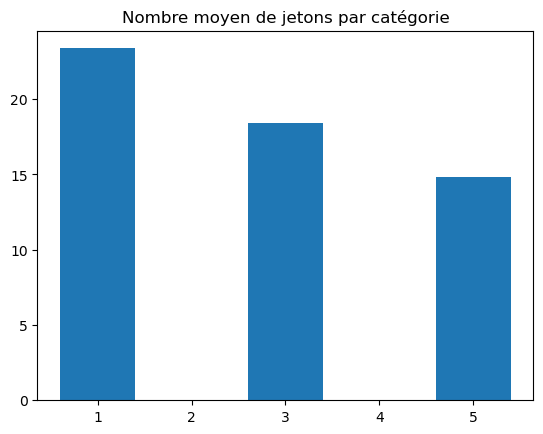

In [7]:
nJetonsCat = {}
nExamplesCat = {}

for rating, text in zip(data['rating'], data['text']):
    if rating not in nJetonsCat:
        nJetonsCat[rating] = 0
        nExamplesCat[rating] = 0
    nJetonsCat[rating] += len(text)
    nExamplesCat[rating] += 1

for rating in nJetonsCat:
    nJetonsCat[rating] /= nExamplesCat[rating]

xs,ys = list(zip(*(nJetonsCat.items())))

plt.bar(xs, ys)
plt.title('Nombre moyen de jetons par catégorie')
plt.show()


<a name='1.3.3'></a>
#### 1.3.3 Afficher en texte les top 10 des jetons les plus fréquents par catégorie (4 points)


Affichez en texte les 10 jetons les plus fréquents selon la catégorie.


In [8]:
from collections import Counter

counters = dict([(1,Counter()),(3,Counter()),(5,Counter())])

for _, row in data.iterrows():
    for w in row['text']:
        counters[row['rating']][w] += 1


xs = [1,3,5]
ys = [counters[x].most_common(10) for x in xs]

print('10 jetons les plus communs par catégorie')

for x,y in zip(xs,ys):
    print(f'\nCatégorie : {x}\n{y}\n')


10 jetons les plus communs par catégorie

Catégorie : 1
[('batteri', 1211), ('last', 403), ('one', 345), ('use', 328), ('amazon', 311), ('work', 265), ('buy', 235), ('dont', 221), ('star', 179), ('purchas', 162)]


Catégorie : 3
[('batteri', 454), ('tablet', 380), ('good', 360), ('use', 244), ('last', 238), ('great', 228), ('price', 228), ('three', 193), ('star', 186), ('long', 183)]


Catégorie : 5
[('great', 615), ('tablet', 386), ('batteri', 374), ('love', 306), ('good', 260), ('price', 244), ('use', 211), ('star', 182), ('five', 181), ('work', 167)]



<a name='1.3.4'></a>
#### 1.3.4 Afficher en texte les top 10 des adjectifs les plus fréquents selon la catégorie (4 points)

Pour cet exercice, vous devrez utiliser la fonction [nltk.pos_tag](https://www.nltk.org/book/ch05.html) et retenir les jetons identifiés comme JJ.
 
Pour obtenir de bons résultats, le tagger [nltk.pos_tag](https://www.nltk.org/book/ch05.html) doit être exécuté sur le texte original, incluant les stopwords. 
Vous devrez donc partir des évaluations originales. Pour vous simplifier la tâche, utilisez 
le tokenizer *word_tokenize* provenant de nltk.

**Les adjectifs sont les jetons identifiés comme JJ.**

In [9]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag


counters_adj = dict([(1,Counter()),(3,Counter()),(5,Counter())])

def preprocess_second(text):
    text = text.lower()
    sentence = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(sentence)
    tags = pos_tag(tokens)
    return tags

for _, row in data.iterrows():
    for w, tag in preprocess_second(row['text_original']):
        if tag == 'JJ':
            counters_adj[row['rating']][w] += 1


xs = [1,3,5]
ys = [counters_adj[x].most_common(10) for x in xs]

print('10 jetons les plus communs par catégorie')

for x,y in zip(xs,ys):
    print(f'\nCatégorie : {x}\n{y}\n')

10 jetons les plus communs par catégorie

Catégorie : 1
[('last', 275), ('i', 172), ('dead', 114), ('good', 109), ('amazon', 87), ('other', 86), ('bad', 78), ('few', 72), ('same', 71), ('new', 63)]


Catégorie : 3
[('good', 357), ('great', 228), ('i', 217), ('last', 204), ('other', 89), ('ok', 72), ('slow', 63), ('old', 63), ('little', 63), ('decent', 52)]


Catégorie : 5
[('great', 615), ('good', 258), ('i', 107), ('easy', 100), ('old', 91), ('other', 65), ('last', 62), ('kindle', 53), ('excellent', 51), ('nice', 48)]



<a name='1.4'></a>
### 1.4 Diviser les données en ensembles d'entraînement et de test (1 point)

À l'aide de la fonction [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de SKlearn, séparez les données en ensembles d'entraînement (67% des données) et de test (33% des données). Gardez les deux ensembles dans 2 variables.

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.33, random_state=42)

<a name='1.5'></a>
### 1.5 Construction du vocabulaire (4 points)

Dans un modèle Bag-of-Words (BoW), un vocabulaire est prédéterminé à partir de l'ensemble d'entraînement. Seuls les mots faisant partie de ce vocabulaire seront considérés pour la suite.

Complétez la fonction **build_voc** qui retourne une liste de jetons qui sont présents au moins n fois (threshold passé en paramètre) dans la liste d'exemples (également passée en paramètre). Vous pouvez utiliser la classe Counter.

Ensuite, appelez cette fonction pour construire votre vocabulaire.

In [11]:
from collections import Counter
def build_voc(documents, threshold):
    counter = Counter()

    for document in documents:
        counter.update(document)

    voc = []
    for word, count in counter.items():
        if count >= threshold:
            voc.append(word)
    
    return voc

voc = build_voc(train["text"], 10)

<a name='1.6'></a>
### 1.6 Vectorisation des données (4 points)

À l'aide de la classe [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) de Sklearn, transformez l'ensemble de jetons en matrice de co-occurence utilisant TF-IDF.

Utilisez le vocabulaire construit au numéro précédent dans votre matrice de co-occurrence (voir le paramètre vocabulary de TfidfVectorizer). 

**Faites attention:** Il ne faut pas entrainer (fit) la vectorisation sur l'ensemble de test

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(vocabulary=voc)

train_tfidf = tfidf.fit_transform(train["text"].apply(lambda x: " ".join(x)))

# Taille 1871x614 car 1871 documents et 614 mots dans le vocabulaire
print(train_tfidf)

  (0, 4)	0.42304338942498243
  (0, 3)	0.36193952318732875
  (0, 2)	0.5770201703905862
  (0, 1)	0.3525950199276787
  (0, 0)	0.482450564413983
  (1, 15)	0.2492036009178399
  (1, 14)	0.24053591320326656
  (1, 13)	0.21031667979434754
  (1, 12)	0.25617709863996324
  (1, 11)	0.4810718264065331
  (1, 10)	0.19467549435765089
  (1, 9)	0.1684348845370192
  (1, 8)	0.16985006928909213
  (1, 7)	0.5291077731116554
  (1, 6)	0.3488169586225522
  (1, 5)	0.2049485673525454
  (2, 17)	0.27957520459419716
  (2, 16)	0.7402818284820823
  (2, 1)	0.36076457650228777
  (2, 0)	0.4936288481607033
  (3, 28)	0.24541137392588525
  (3, 27)	0.38520153679700686
  (3, 26)	0.26388032397623734
  (3, 25)	0.29272444727261016
  (3, 24)	0.2981860148830343
  :	:
  (1869, 20)	0.5423361249416394
  (1869, 18)	0.30594931135293607
  (1869, 17)	0.23733877758961336
  (1869, 5)	0.28799863243837726
  (1870, 553)	0.17338195462454878
  (1870, 304)	0.12801124033656952
  (1870, 301)	0.2330985090925617
  (1870, 296)	0.13311965261369227
  (1

<a name='2'></a>
## 2. Classification (35 points)

Maintenant que les données sont prêtes à être utilisées par nos modèles, nous allons entrainer et tester différent types de modèles sur le jeu de données afin d'en faire la comparaison. 

Cette section sera divisé en cinq modèle:
   - Modèle aléatoire (Random baseline)
   - Classificateur bayésien naïf
   - Régression Logistique
   - Multi-Layer Perceptron (MLP)

<a name='2.1'></a>
### 2.1 Modèle aléatoire (Random baseline) (5 points)

Un seuil (baseline) est un modèle servant de référence et dont les performances représentent un seuil à dépasser.

#### a) Générez ce seuil en effectuant des prédictions aléatoires parmi les valeurs 1, 3 et 5. Ensuite, affichez les mesures de performance : précision, rappel (recall) et F1. Utilisez la classe classification_report de SKlearn et affichez 4 chiffres après la virgule. (3.5 points)

In [13]:
import random

random_preds = dict([(index,random.choice([1,3,5])) for index, _ in train.iterrows()])
random_preds

{2788: 5,
 2353: 3,
 718: 1,
 366: 3,
 2190: 3,
 2238: 5,
 555: 1,
 1560: 3,
 1391: 5,
 304: 3,
 1607: 5,
 203: 1,
 1196: 5,
 932: 5,
 2083: 1,
 120: 3,
 283: 1,
 1204: 1,
 575: 3,
 1911: 5,
 2757: 3,
 1767: 1,
 2339: 3,
 275: 3,
 2537: 5,
 256: 3,
 360: 5,
 1429: 3,
 1801: 5,
 1747: 5,
 604: 1,
 1106: 3,
 1888: 5,
 629: 1,
 2195: 1,
 1929: 3,
 1125: 3,
 286: 1,
 2698: 1,
 2059: 5,
 300: 1,
 2029: 5,
 1997: 3,
 1190: 1,
 423: 5,
 2153: 1,
 1576: 1,
 1983: 1,
 162: 3,
 65: 5,
 2067: 1,
 856: 1,
 890: 1,
 2270: 5,
 1535: 3,
 742: 5,
 1505: 1,
 1729: 3,
 230: 5,
 2089: 1,
 1873: 5,
 2174: 3,
 1259: 3,
 2503: 5,
 1652: 3,
 1268: 5,
 1080: 1,
 2515: 3,
 836: 3,
 1349: 1,
 374: 5,
 1100: 1,
 1905: 5,
 1553: 3,
 1569: 1,
 297: 5,
 598: 5,
 2086: 5,
 751: 3,
 99: 1,
 1149: 1,
 1498: 5,
 866: 5,
 736: 1,
 1914: 3,
 2273: 3,
 1551: 5,
 529: 3,
 1550: 3,
 642: 1,
 2777: 1,
 636: 1,
 2459: 1,
 185: 3,
 1735: 1,
 1662: 1,
 937: 1,
 1716: 1,
 2766: 5,
 931: 5,
 1864: 5,
 1216: 3,
 2133: 5,
 1228: 5,

In [14]:
from sklearn.metrics import classification_report

y_true = []
y_preds = []

for index, row in train.iterrows():
    y_true.append(row['rating'])
    y_preds.append(random_preds[index])

print(classification_report(y_true, y_preds, digits=4))

              precision    recall  f1-score   support

           1     0.3349    0.3575    0.3458       593
           3     0.3511    0.3455    0.3483       628
           5     0.3210    0.3062    0.3134       650

    accuracy                         0.3356      1871
   macro avg     0.3357    0.3364    0.3358      1871
weighted avg     0.3355    0.3356    0.3354      1871



#### b) Comment pouvez-vous expliquer le F1-score obtenu? (1.5 points)

> *Entrez votre réponse ici*

<a name='2.2'></a>
### 2.2 Analyse et compréhension d'un classificateur bayésien naïf (NB) (22 points)

Naive Bayes (NB) est un algorithme très simple pouvant servir de bon point de départ (baseline) pour les tâches de classification. Ce numéro portera sur l'analyse de ce modèle afin de bien comprendre son comportement.

<a name='2.2.1'></a>
#### 2.2.1 Construction du modèle (4 points)

Commencez d'abord par construire le modèle à l'aide de la classe MultinomialNB de SKlearn. Utilisez les données vectorisées produites en 1.6.

Affichez les performances de votre classificateur (précision, recall, F1-score).

In [15]:
from sklearn.naive_bayes import MultinomialNB

modelNB = MultinomialNB()
modelNB.fit(train_tfidf, train["rating"])


MultinomialNB()

In [16]:
test_tfidf = tfidf.transform(test["text"].apply(lambda x: " ".join(x)))
y_preds = modelNB.predict(test_tfidf)
print(classification_report(test["rating"], y_preds, digits=4))

              precision    recall  f1-score   support

           1     0.8552    0.8411    0.8481       302
           3     0.7774    0.6944    0.7335       337
           5     0.7469    0.8551    0.7974       283

    accuracy                         0.7918       922
   macro avg     0.7932    0.7968    0.7930       922
weighted avg     0.7935    0.7918    0.7906       922



<a name='2.2.2'></a>
####  2.2.2 Matrice de confusion (3 points)

Visualisez la matrice de confusion de votre modèle en utilisant la fonction [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) de seaborn. Celle-ci peut prendre en entrée une matrice de confusion comme celle fournie par la fonction [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) dans SKLearn.

<Axes: >

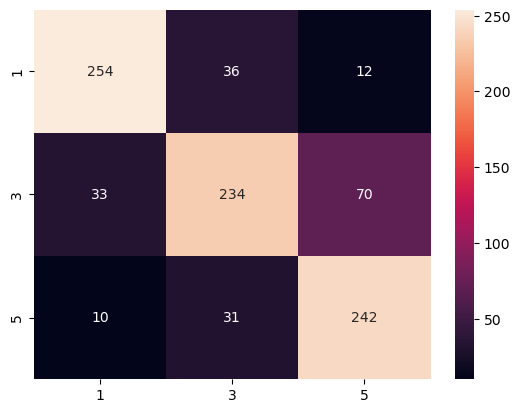

In [17]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

conf_matrix_nb = confusion_matrix(test["rating"], y_preds)

heatmap(conf_matrix_nb, annot=True, fmt="d", xticklabels=[1,3,5], yticklabels=[1,3,5])

<a name='2.2.3'></a>
####  2.2.3 Visualisation des probabilités de NB (5 points)

Naive Bayes est un classificateur suivant une approche générative. Durant son entraînement, il apprend les probabilités P(x_i|y). En utilisant le théorème de Bayes, on peut exprimer la probabilité d'une classe donnée y étant donné un ensemble de caractéristiques x_1, x_2, ..., x_n comme suit : 

$$ P(y|x_1, x_2, ..., x_n) = P(y) * P(x_1|y) * P(x_2|y) * ... * P(x_n|y) $$

Ainsi, étant donné un exemple ayant le jeton x_i, plus la probabilité P(x_i|y) est élevée pour une classe, plus la probabilité que l'exemple provienne de cette classe augmente.

Écrivez du code permettant de visualiser les jetons ayant les plus grandes probabilités selon la classe dans un graphique de type [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Consultez la documentation de [MultiNomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) afin de trouver les probabilités P(x_i|y). Le graphique produit devrait montrer, sur l'axe des Y, les 10 jetons associés au P(x_i|y) le plus grand selon y. L'axe des X devrait représenter la valeur des probabilités.

Ce code devra être sous forme d'une fonction où on passe la classe y en paramètre.


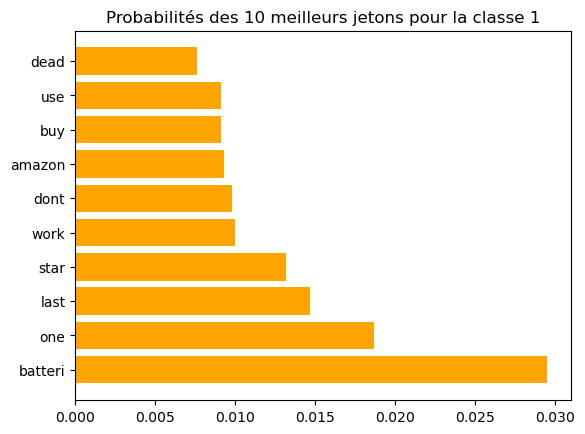

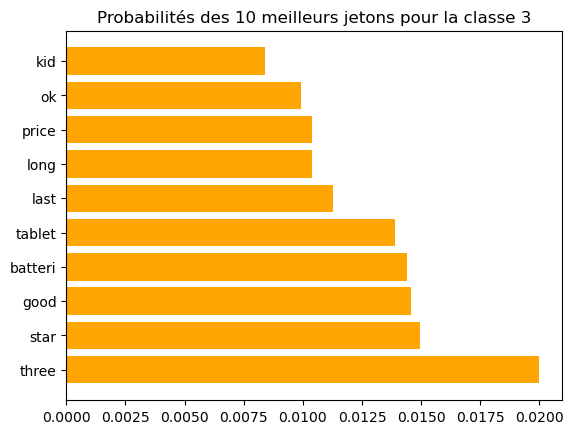

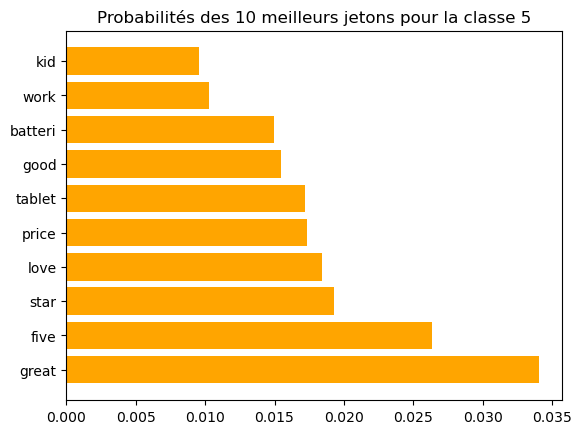

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def probability_visualisation(y):
    """
    Fonction qui affiche les distributions de probabilité des mots pour une classe donnée en paramètre.
    """

    if y not in [1,3,5]:
        print("La classe doit être 1, 3 ou 5")
        return
    
    index = (y - 1) // 2

    probabilities = np.exp(modelNB.feature_log_prob_[index])
    jetons = list(zip(probabilities, voc))
    jetons.sort(reverse=True)
    best_jetons = jetons[:10]
    
    best_jetons_probs, best_jetons_titles = zip(*best_jetons)

    plt.barh(range(10), best_jetons_probs, color="orange")
    plt.yticks(range(10), best_jetons_titles)
    plt.title(f"Probabilités des 10 meilleurs jetons pour la classe {y}")
    plt.show()


probability_visualisation(1)
probability_visualisation(3)
probability_visualisation(5)
    

Que pouvez-vous remanquer à propos des jetons affichés dans le graphique?

> La plupart des jetons présents dans chaque graphique font parti des mots les plus fréquents de chaque classe. (Obtenus lors de la question 1.3.3)
Par exemple pour la classe 5, les jetons "great", "tablet", "batteri", "love", "good", "price", "star", "five", "work" sont ceux ayant la probabilités conditionnelle P(x_i|y) la plus élevée. Ces jetons sont aussi parmi les plus fréquents de cette classe.

<a name='2.2.4'></a>
#### 2.2.4 Visualisation des erreurs commises  (3 points)

Trouvez toutes les phrases dont la vraie valeur est 5 mais la valeur prédite est de 1.

Affichez ces exemples d'une manière lisible.


In [19]:
test_prediction = test.copy()
test_prediction["prediction"] = y_preds

allErrors = test_prediction[test_prediction["rating"] != test_prediction["prediction"]]

errors_5_1 = allErrors[(allErrors["rating"] == 5) & (allErrors["prediction"] == 1)]

print("Erreurs de prédiction (messages 5 étoiles prédits comme 1 étoile) : " ,end="\n\n")

for index, row in errors_5_1.iterrows():
    print(row["text_original"])

Erreurs de prédiction (messages 5 étoiles prédits comme 1 étoile) : 

The batteries appear to be working great. I've been using two AA's in my Xbox ... The batteries appear to be working great. I've been using two AA's in my Xbox One controller for over a month now. If you can get a sale on these like I did, buy, buy, buy!
Good They work just like the ones you buy at Walmart.
Very impressive.... I ran a test with these batteries because I was skeptical. I ran a Sennheiser wireless mic transmitter for nearly twelve hours and the receiver ran for over 16. These are great numbers. I can get through a full day of shooting with a handful of these.
Saved Me From Bear Attack So... One day I was camping in the Wild West on the Rocky Mountains in Colorado... I was carrying my trusty Power Rangers limited edition collectors sword. Out of nowhere... A bear attacked me. I grabbed my trusty sword, but it was out of batteries so it did not make the swoosh sounds that adds to the effect of my swing. 

<a name='2.2.5'></a>
#### 2.2.5 Analyse d'erreurs commises (7 points)

Complétez la fonction plot_example qui:
   - Prend en entrée une liste de jetons provenant d'un exemple. 
   - Produit un graphique qui pour chaque jeton, affiche la valeur P(x_i|y=5) et P(x_i|y=1)
    
**Pour vous faciliter le travail, utiliser barh de pandas et non de matplotlib**: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html


#### a) Exécutez votre fonction avec une phrase au choix dont la vraie valeur est 5 mais la valeur prédite est de 1. (4 points)

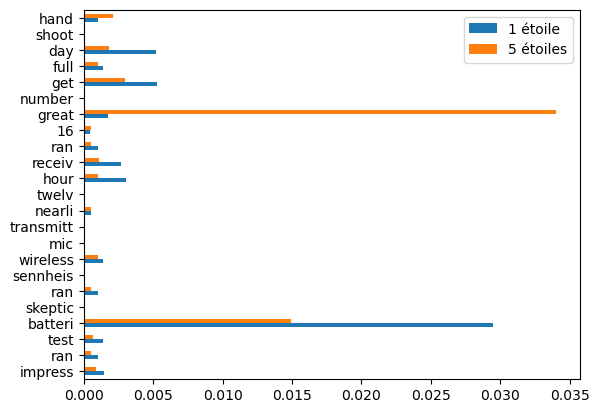

In [20]:
def plot_example(tokens):

    probabilities_1 = np.exp(modelNB.feature_log_prob_[0])
    jetons_1 = list(zip(voc, probabilities_1))
    dict_jetons_1 = dict(jetons_1)

    tokens_prob_1 = []
    for token in tokens:
        tokens_prob_1.append(dict_jetons_1[token]) if token in dict_jetons_1 else tokens_prob_1.append(0)

    probabilities_5 = np.exp(modelNB.feature_log_prob_[2])
    jetons_5 = list(zip(voc, probabilities_5))
    dict_jetons_5 = dict(jetons_5)

    tokens_prob_5 = []
    for token in tokens:
        tokens_prob_5.append(dict_jetons_5[token]) if token in dict_jetons_5 else tokens_prob_5.append(0)

    data_to_plot = pd.DataFrame({"1 étoile": tokens_prob_1, "5 étoiles": tokens_prob_5}, index=tokens)
    data_to_plot.plot.barh()

plot_example(errors_5_1.iloc[2]["text"])


#### b) Suite à cette analyse, pouvez-vous voir une tendance dans les exemples qui sont prédits comme faisant partie de la classe 1 mais faisant réellement partie de la classe 5 ?  (3 points)

> *Entrez votre réponse ici*

<a name='2.3'></a>
### 2.3 Régression logistique (4 points)

Entrainez un modèle de [régression logistique](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) à l'aide de SKLearn en utilisant les données produites en 1.6 et affichez sa performance avec les mêmes métriques que précédemment. 

Rapport de classification:
              precision    recall  f1-score   support

           1       0.89      0.87      0.88       302
           3       0.77      0.79      0.78       337
           5       0.83      0.83      0.83       283

    accuracy                           0.83       922
   macro avg       0.83      0.83      0.83       922
weighted avg       0.83      0.83      0.83       922

Matrice de confusion:


<Axes: >

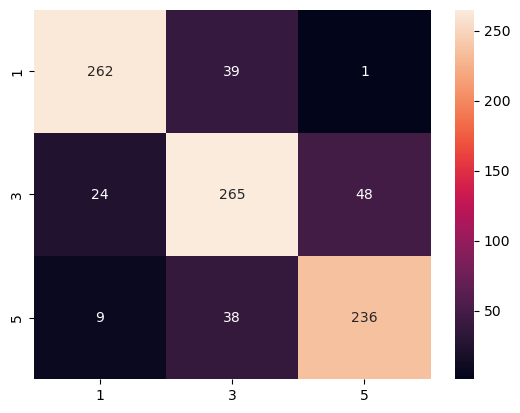

In [21]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(train_tfidf, train["rating"])

test_tfidf = tfidf.transform(test["text"].apply(lambda x: " ".join(x)))

predictions = logReg.predict(test_tfidf)
conf_matrix_lr = confusion_matrix(test["rating"], predictions)

print("Rapport de classification:")
print(classification_report(test["rating"], predictions))
print("Matrice de confusion:")
heatmap(conf_matrix_lr, annot=True, fmt="d", xticklabels=[1,3,5], yticklabels=[1,3,5])

<a name='2.4'></a>
### 2.4 MLP (4 points)

Entrainez un modèle neuronal de type [Multi-layer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) à l'aide de SKLearn en utilisant les données produites en 1.6. Affichez sa performance avec les mêmes métriques que précédemment. 

Rapport de classification:
              precision    recall  f1-score   support

           1       0.90      0.85      0.87       302
           3       0.77      0.80      0.78       337
           5       0.80      0.81      0.80       283

    accuracy                           0.82       922
   macro avg       0.82      0.82      0.82       922
weighted avg       0.82      0.82      0.82       922

Matrice de confusion:


<Axes: >

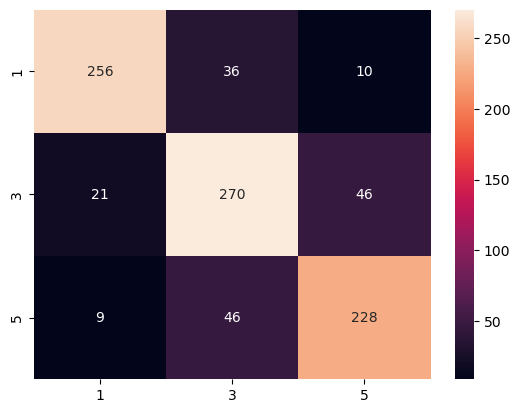

In [22]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(train_tfidf, train["rating"])

predictions = mlp.predict(test_tfidf)

confMatrix = confusion_matrix(test["rating"], predictions)


print("Rapport de classification:")
print(classification_report(test["rating"], predictions))
print("Matrice de confusion:")
heatmap(confMatrix, annot=True, fmt="d", xticklabels=[1,3,5], yticklabels=[1,3,5])

<a name='3'></a>
## 3. Amélioration de modèle (30 points)

Cette dernière partie consistera à améliorer votre modèle de deux façons différentes.

Tout d'abord, vous effectuerez une recherche d'hyper-paramètres avec une validation croisée en utilisant une grille de recherche (GridSearch). Ensuite, vous réaliserez de l'extraction d'attributs (feature extraction) afin d'entraîner un nouveau modèle.

<a name='3.1'></a>
###  3.1 Recherche d'hyper-paramètres et validation croisée (5 points)

La classe [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) permet d'explorer toutes les combinaisons possibles d'hyper-paramètres que l'on spécifie afin de trouver la configuration optimale. De plus, il est tout à fait possible de fusionner les paramètres du pré-traitement et ceux du classificateur en utilisant la classe [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).
Pour la rédaction de votre code, vous avez la possibilité de vous référer au tutoriel du cours.

#### a) Dans cette phase, l'objectif est de découvrir une configuration optimale pour le modèle LogisticRegression en conjonction avec la technique de vectorisation TF-IDF. Cette recherche devra être guidée par la métrique du F1-score pondéré (weighted F1). Vous devrez aussi effectuer une exploration de paramètres sur au moins deux attributs liés à TF-IDF et deux paramètres de la régression logistique. Affichez ensuite la performance finale du modèle optimal ainsi que ses paramètres. (3 points)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('tfidf', TfidfVectorizer()), ('logistic', LogisticRegression(max_iter=1000))])

parameters = {
    'tfidf__use_idf': (True, False),
    'tfidf__smooth_idf' : (True, False),
    "logistic__C": (0.01, 0.1, 1, 10, 100),
    "logistic__solver": ("newton-cg", "lbfgs", "liblinear", "sag", "saga")
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=1, verbose=5)
grid_search.fit(train["text"].apply(lambda x : " ".join(x)), train["rating"])
pipe_y_preds = grid_search.predict(test["text"].apply(lambda x : " ".join(x)))
weighted_f1_score = f1_score(test["rating"], pipe_y_preds,average="weighted")

print("Meilleurs paramètres trouvés:\n", grid_search.best_params_, "\n")
print("Meilleur score atteint:\n", grid_search.best_score_, "\n")
print("Le F1 score weighted est:\n", weighted_f1_score, "\n")
print("Rapport de classification:")
print(classification_report(test["rating"], pipe_y_preds))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END logistic__C=0.01, logistic__solver=newton-cg, tfidf__smooth_idf=True, tfidf__use_idf=True;, score=0.707 total time=   0.0s
[CV 2/5] END logistic__C=0.01, logistic__solver=newton-cg, tfidf__smooth_idf=True, tfidf__use_idf=True;, score=0.687 total time=   0.0s
[CV 3/5] END logistic__C=0.01, logistic__solver=newton-cg, tfidf__smooth_idf=True, tfidf__use_idf=True;, score=0.714 total time=   0.0s
[CV 4/5] END logistic__C=0.01, logistic__solver=newton-cg, tfidf__smooth_idf=True, tfidf__use_idf=True;, score=0.719 total time=   0.0s
[CV 5/5] END logistic__C=0.01, logistic__solver=newton-cg, tfidf__smooth_idf=True, tfidf__use_idf=True;, score=0.714 total time=   0.0s
[CV 1/5] END logistic__C=0.01, logistic__solver=newton-cg, tfidf__smooth_idf=True, tfidf__use_idf=False;, score=0.707 total time=   0.0s
[CV 2/5] END logistic__C=0.01, logistic__solver=newton-cg, tfidf__smooth_idf=True, tfidf__use_idf=False;, score=0.701 to

#### b) Quels sont les attributs que vous avez choisis et quels sont leurs valeurs optimales?  (2 points)

Les attributs que nous avons choisi pour TF-IDF sont : smooth_idf et use_idf. Leur valeurs optimales sont respectivement de False et True. Pour la régression logistique, nous avons choisi c et solver. Leur valeurs optimales sont : 10 et saga.

<a name='3.2'></a>
###  3.2 Extraction d'attributs (Feature extraction) avec ChatGPT (15 points)

ChatGPT peut être très utile pour donner des idées ou donner du squelette de code (lorsque c'est permis! :) ). Cette partie vous fait explorer l'utilisation de ChatGPT pour générer du code permettant d'extraire des attributs (feature extraction) à partir du texte des évaluations. 

En utilisant ChatGPT ainsi que votre recherche personnelle, essayez de déterminer un ensemble d'attributs que vous pourriez utiliser pour représenter chaque évaluation. A vous de voir comment vous pouvez obtenir une réponse satisfaisante de ChatGPT. 

#### a) Indiquez dans la cellule ci-dessous les descriptions d'attributs suggérées par ChatGPT ainsi que les vôtres. Différenciez clairement vos attributs - s'il y en a - de ceux de ChatGPT. (4 points)


Longueur du texte : Calculer la longueur en nombre de mots ou en nombre de caractères du texte de l'évaluation. Cela peut donner une idée de la longueur de l'avis.

Note normalisée : Si la note est sur une échelle différente de celle que vous souhaitez, vous pouvez normaliser les notes pour qu'elles soient sur la même échelle, par exemple, de 0 à 5.

Moyenne des mots par phrase : Calculez la moyenne du nombre de mots par phrase dans le texte de l'évaluation. Cela pourrait donner une idée de la complexité de l'écriture.

Nombre de mots dans le texte : Calculez le nombre de mots dans le texte de l'évaluation.

Nombre de mots dans le titre : Calculez le nombre de mots dans le titre de l'évaluation.

#### b) Indiquez ci-dessous le code généré par ChatGPT que vous avez décidé de conserver pour représenter chaque évaluation.  (2 points)

In [24]:
import pandas as pd
import nltk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

# Charger la DataFrame Pandas avec les avis Amazon
data = pd.read_csv("amazon_rating.csv")  # Assurez-vous de spécifier le bon chemin du fichier CSV

# 1. Texte du commentaire et du titre
# Utilisation de la tokenisation pour convertir le texte en listes de mots
data['comment_tokenized'] = data['comment'].apply(nltk.word_tokenize)
data['title_tokenized'] = data['title'].apply(nltk.word_tokenize)

# 2. Longueur du commentaire et du titre
data['comment_length'] = data['comment'].apply(len)
data['title_length'] = data['title'].apply(len)

# 3. Polarité du sentiment
data['comment_sentiment'] = data['comment'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['title_sentiment'] = data['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 4. Fréquence des mots clés (Exemple avec les mots "bon" et "mauvais")
vectorizer = CountVectorizer(vocabulary=["bon", "mauvais"])
comment_keywords = vectorizer.fit_transform(data['comment']).toarray()
title_keywords = vectorizer.fit_transform(data['title']).toarray()

# Ajouter les colonnes de fréquence des mots clés à la DataFrame
data['comment_bon_count'] = comment_keywords[:, 0]
data['comment_mauvais_count'] = comment_keywords[:, 1]
data['title_bon_count'] = title_keywords[:, 0]
data['title_mauvais_count'] = title_keywords[:, 1]

# 5. (Optionnel) Analyse de la syntaxe et 6. Analyse des émotions
# Vous pouvez utiliser des bibliothèques NLP plus avancées comme SpaCy ou NLTK pour des analyses plus complexes.

# 6. Informations sur le produit
# Si vous avez des informations sur le produit dans la DataFrame, vous pouvez les utiliser ici.

KeyError: 'comment'



#### c) Il se peut que le code généré ait besoin d'être adapté à notre jeu de données. Si c'est le cas, corrigez le code et montrez le résultat après vos correction dans la cellule ci-dessous. Le code final devrait être une fonction qui vous retourne, pour un document, un dictionnaire d'attributs et leurs valeurs. N'oubliez pas d'indiquer votre propre code s'il y en a. (5 points)

In [25]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

mots_a_compter = ["battery", "last", "great", "love", "five", "three", "one"]
word_features = [
    prefix + word + "_count"
    for word in mots_a_compter
    for prefix in ["text_", "title_"]
]
vectorizer = CountVectorizer(vocabulary=mots_a_compter)

mlp_features_names = [
    "text_length",
    "title_length",
    "text_polarity",
    "title_polarity",
    "text_subjectivity"
] + word_features

all_features_names = mlp_features_names + ["text_tokenized", "title_tokenized", "full_text"]


def features_from_doc(doc, features_names, tfidf_features=False):
    features = {}

    # CODE DE CHATGPT ADAPTE AU TP

    # 1. Texte du commentaire et du titre
    if "text_tokenized" in features_names:
        features['text_tokenized'] = preprocess(doc['text'])
    if "title_tokenized" in features_names:
        features['title_tokenized'] = preprocess(doc['title'])

    # 2. Longueur du commentaire et du titre
    if "text_length" in features_names:
        features["text_length"] = len(doc["text"])
    if "title_length" in features_names:
        features["title_length"] = len(doc["title"])

    # 3. Polarité du sentiment
    textBlobAnalysis = TextBlob(doc["text"])
    if "text_polarity" in features_names:
        features["text_polarity"] = textBlobAnalysis.sentiment.polarity
    if "title_polarity" in features_names:
        features["title_polarity"] = TextBlob(doc["title"]).sentiment.polarity

    # 4. Fréquence des mots-clés
    text_keywords = vectorizer.fit_transform([doc["text"]]).toarray()
    title_keywords = vectorizer.fit_transform([doc["title"]]).toarray()

    for i, word in enumerate(mots_a_compter):
        if "text_" + word + "_count" in features_names:
            features["text_" + word + "_count"] = text_keywords[0, i]
        if "title_" + word + "_count" in features_names:
            features["title_" + word + "_count"] = title_keywords[0, i]

    # FIN DU CODE DE CHATGPT

    # ce code a été proposé par copilot, et semble pertinent
    # nous l'avons donc rajouté à l'analyse
    if "text_subjectivity" in features_names:
        features["text_subjectivity"] = textBlobAnalysis.sentiment.subjectivity

    # on ajoute les notes pour l'entrainement
    features["rating"] = doc["rating"]

    # on ajoute le texte complet
    if 'text_tokenized' in features_names and 'title_tokenized' in features_names:
        features["full_text"] = " ".join(features["text_tokenized"] + features["title_tokenized"])


    return features

#### d) Utilisez le code corrigé ci-dessus pour entrainer un modèle MLP avec votre nouvelle représentation des évaluations. Affichez sa performance. (4 points)

In [26]:
def df_from_features(features_names):
    df_temp = pd.read_csv("amazon_rating.csv")
    dics = df_temp.apply(lambda x: features_from_doc(x, features_names), axis=1)
    return pd.DataFrame(dics.tolist())

df_treated_mlp = df_from_features(mlp_features_names)
df_treated_mlp

,text_length,title_length,text_polarity,title_polarity,text_battery_count,title_battery_count,text_last_count,title_last_count,text_great_count,title_great_count,text_love_count,title_love_count,text_five_count,title_five_count,text_three_count,title_three_count,text_one_count,title_one_count,text_subjectivity,rating
0,22,10,0.700000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.600000,5
1,178,11,-0.055556,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.622222,3
2,216,13,0.397959,0.800000,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0.555102,5
3,93,26,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.050000,1
4,101,8,-0.250000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.400000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,46,11,-0.183333,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.488889,3
2789,133,22,0.295333,0.200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.554000,3
2790,55,19,0.156250,0.700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500000,3
2791,112,18,0.104167,0.166667,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0.333333,3


In [27]:
train, test = train_test_split(df_treated_mlp, test_size=0.33)
X = train[mlp_features_names]
Y = train["rating"]
mlp = MLPClassifier()
mlp.fit(X, Y)
predictions = mlp.predict(test[mlp_features_names])
print("Rapport de classification:")
print(classification_report(test["rating"], predictions))

Rapport de classification:
              precision    recall  f1-score   support

           1       0.69      0.85      0.77       291
           3       0.55      0.65      0.60       312
           5       0.89      0.55      0.68       319

    accuracy                           0.68       922
   macro avg       0.71      0.69      0.68       922
weighted avg       0.72      0.68      0.68       922



<a name='3.3'></a>
### 3.3 Amélioration du modèle en 3.2 (10 points)

Il est possible que les résultats obtenus au numéro précédent ne soient pas très élevés. 

#### a) Trouvez une manière d'utiliser ces attributs avec d'autres éléments afin **d'au moins** obtenir une meilleure performance que n'importe quel score obtenu au numéro 2.x , **sans faire de recherche d'hyper-paramètres**. Essayez d'obtenir la meilleure performance possible. Vous êtes libres d'utiliser n'importe quel algorithme de ce laboratoire. Affichez le code et les performances de votre modèle. (8 points)

In [66]:
from sklearn.preprocessing import StandardScaler

mots_a_compter = ["battery", "last", "great", "love", "five", "three", "one"]
word_features = [
    prefix + word + "_count"
    for word in mots_a_compter
    for prefix in ["text_", "title_"]
]
vectorizer = CountVectorizer(vocabulary=mots_a_compter)

features_to_scale = [
    "text_length",
    "title_length",
    "text_polarity",
    "title_polarity",
    "text_subjectivity"
] + word_features

df_treated = df_from_features(all_features_names)

train, test = train_test_split(df_treated, test_size=0.33)

# Utilisation de la vectorisation TF-IDF
voc = build_voc(train["full_text"].apply(lambda x: x.split(" ")), 10)

tfidf_label = ["tfidf_" + str(i) for i in range(len(voc))]

tfidf = TfidfVectorizer(vocabulary=voc)

train_tfidf_matrix = tfidf.fit_transform(train["full_text"]).toarray()
train.reset_index(drop=True, inplace=True)
train = pd.concat([train, pd.DataFrame(train_tfidf_matrix, columns=tfidf_label)], axis=1)

test_tfidf_matrix = tfidf.transform(test["full_text"]).toarray()
test.reset_index(drop=True, inplace=True)
test = pd.concat([test, pd.DataFrame(test_tfidf_matrix, columns=tfidf_label)], axis=1)

# Normalisation des features (sauf TF-IDF)
scaler = StandardScaler()
scaler.fit(train[features_to_scale])
train[features_to_scale] = scaler.transform(train[features_to_scale])
test[features_to_scale] = scaler.transform(test[features_to_scale])

# Features utilisées pour le MLP

mlp_features_names_2 = features_to_scale + word_features + tfidf_label

# On utilise un MLPClassifier
mlp = MLPClassifier(max_iter=2000, 
                    learning_rate="adaptive", 
                    hidden_layer_sizes=(150, 150, 150), 
                    alpha=0.0005, 
                    beta_1=0.95, 
                    beta_2=0.9999)

X = train[mlp_features_names_2]
Y = train["rating"]

mlp.fit(train[mlp_features_names_2], train["rating"])

predictions = mlp.predict(test[mlp_features_names_2])


Rapport de classification:
              precision    recall  f1-score   support

           1       0.90      0.87      0.88       299
           3       0.79      0.82      0.81       309
           5       0.86      0.85      0.86       314

    accuracy                           0.85       922
   macro avg       0.85      0.85      0.85       922
weighted avg       0.85      0.85      0.85       922

Matrice de confusion:


<Axes: >

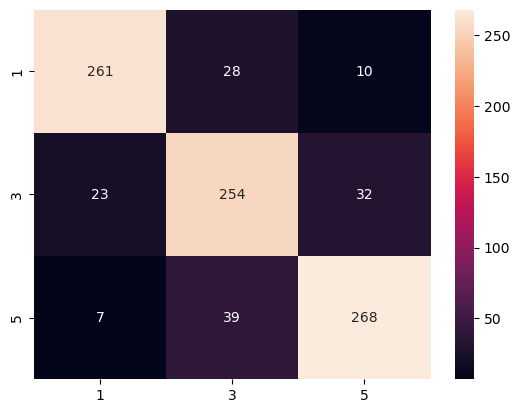

In [67]:
print("Rapport de classification:")
print(classification_report(predictions, test["rating"]))
print("Matrice de confusion:")
heatmap(confusion_matrix(predictions, test["rating"]), annot=True, fmt="d", xticklabels=[1,3,5], yticklabels=[1,3,5])

#### b) Quelles sont vos conclusions concernant l'utilisation de ChatGPT et les représentations possibles des documents ? (2 points)

Nous concluons de ce laboratoire qu'il est possible d'avoir plusieurs différentes représentations des mêmes documents et que ces représentations ont un effet direct sur les modèles utilisés. Ceci est observable dans les différents scores obtenus dans la section 3. En ce qui concerne ChatGPT, nous avons remarqué qu'il nous a proposé un attribut qui faussait la mesure de la performance de notre modèle. Il est donc utile mais lorsqu'il n'est pas au courant de tous les aspects du contexte il ne peut pas donner une réponse correcte.

## LIVRABLES:
Vous devez remettre sur Moodle, avant la date d'échéance, un zip contenant les fichiers suivants :

1-	Le code : Vous devez compléter le squelette inf8460_A23_TP1.ipynb sous le nom   GR0X_equipe_i_inf8460_A23_TP1(X: numéro du groupe de laboratoire; i = votre numéro d’équipe). Indiquez vos noms et matricules au début du notebook. Ce notebook doit contenir les fonctionnalités requises. 

2-	Un fichier pdf représentant votre notebook complètement exécuté sous format pdf. 
Pour créer le fichier cliquez sur File > Download as > PDF via LaTeX (.pdf). Assurez-vous que le PDF est entièrement lisible.


## EVALUATION 

Votre TP sera évalué selon les critères suivants :

1. Exécution correcte du code: Tout votre code et vos résultats doivent être exécutables et reproductibles.
2. Qualité du code (noms significatifs, structure, gestion d’exception, etc.) avec, entre autres, les recommandations suivantes:
    - Il ne devrait pas y avoir de duplication de code. Utilisez des fonctions pour garder votre code modulaire
    - Votre code devrait être optimisé: un code trop lent entraînera une perte de points
3. Lisibilité du code (Commentaires clairs et informatifs): Le code doit être exécutable sans erreur et accompagné de commentaires appropriés de manière à expliquer les différentes fonctions
4. Performance attendue des modèles
5. Effort effectué dans la recherche d'autres types d'attributs et dans l'utilisation de ChatGPT
6. Réponses correctes/sensées aux questions de réflexion ou d'analyse
7. PDF entièrement lisible. Les parties illisibles ne seront pas corrigées et aucune modification passée la date de remise ne sera acceptée.
 
